<a href="https://colab.research.google.com/github/Anjani2707/2024-STML_ASSIGNMENTS/blob/main/STML_ASSIGNMENT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks to an external site.



1.Read the data with pandas and find features and target variables
2.Find target variable
3.Train KNN model
4.Find accuracy with different test sizes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/breast_cancer_survival.csv')

In [ ]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
data.replace('FEMALE',0, inplace=True)
data.replace('MALE',1, inplace=True)
data.replace('Positive',1, inplace=True)
data.replace('Negative',0, inplace=True)
data.replace('Dead',0, inplace=True)
data.replace('Alive',1, inplace=True)

<ipython-input-6-709dcaf1cf2f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('MALE',1, inplace=True)
<ipython-input-6-709dcaf1cf2f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Positive',1, inplace=True)
<ipython-input-6-709dcaf1cf2f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [ ]:
data.replace('II',2, inplace=True)
data.replace('III',3, inplace=True)
data.replace('I',1, inplace=True)

<ipython-input-7-fd5d96a82175>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('I',1, inplace=True)


In [ ]:
data.replace('Infiltrating Ductal Carcinoma',1, inplace=True)
data.replace('Infiltrating Lobular Carcinoma',2, inplace=True)
data.replace('Mucinous Carcinoma',3, inplace=True)

<ipython-input-8-ecb44d251b39>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Mucinous Carcinoma',3, inplace=True)


In [ ]:
data.replace('Other',0, inplace=True)
data.replace('Lumpectomy',1, inplace=True)
data.replace('Modified Radical Mastectomy',2, inplace=True)
data.replace('Simple Mastectomy',3, inplace=True)

<ipython-input-9-f9216a2b26c7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Simple Mastectomy',3, inplace=True)


In [ ]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0,20-May-18,26-Aug-18,1.0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0,26-Apr-18,25-Jan-19,0.0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1,24-Aug-18,08-Apr-20,1.0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0,16-Nov-18,28-Jul-20,1.0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1,12-Dec-18,05-Jan-19,1.0


In [ ]:
x=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
y=data['Patient_Status']

In [ ]:
y.isnull().sum()
y.fillna(0,inplace=True)

In [ ]:

from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [ ]:
x.shape

(510, 12)

In [ ]:
y.shape

(510,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
accuracy_list=[]
for i in range(1,101):
  bkn=KNeighborsClassifier(n_neighbors=i)
  bkn.fit(x_train,y_train)
  accuracy_list.append([bkn.score(x_test,y_test)])

In [ ]:

l=[]
for i in range(len(accuracy_list)):
  print(accuracy_list[i])
  l.append(i+1)

[0.7058823529411765]
[0.6666666666666666]
[0.6568627450980392]
[0.6372549019607843]
[0.6274509803921569]
[0.6078431372549019]
[0.6274509803921569]
[0.5882352941176471]
[0.5882352941176471]
[0.5490196078431373]
[0.5784313725490197]
[0.5294117647058824]
[0.5490196078431373]
[0.5392156862745098]
[0.5588235294117647]
[0.5588235294117647]
[0.5588235294117647]
[0.5196078431372549]
[0.5588235294117647]
[0.5588235294117647]
[0.5686274509803921]
[0.5588235294117647]
[0.6372549019607843]
[0.5784313725490197]
[0.6078431372549019]
[0.5980392156862745]
[0.6372549019607843]
[0.6372549019607843]
[0.6274509803921569]
[0.6176470588235294]
[0.6274509803921569]
[0.6078431372549019]
[0.6372549019607843]
[0.6372549019607843]
[0.6372549019607843]
[0.6274509803921569]
[0.6372549019607843]
[0.6372549019607843]
[0.6274509803921569]
[0.5980392156862745]
[0.5882352941176471]
[0.5686274509803921]
[0.5686274509803921]
[0.5882352941176471]
[0.6078431372549019]
[0.6274509803921569]
[0.6274509803921569]
[0.6666666666

In [ ]:
import matplotlib.pyplot as plt

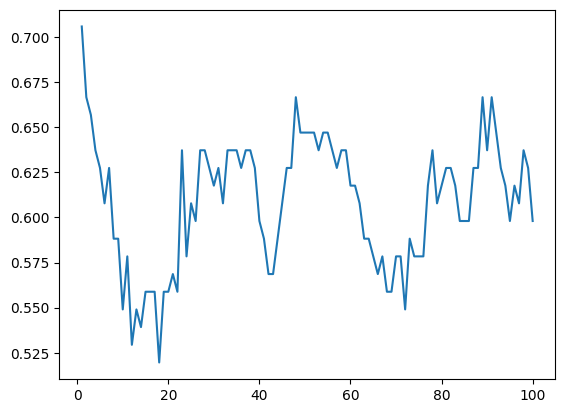

In [ ]:
plt.plot(l,accuracy_list)

Question 2:

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks to an external site.

Implement SVM using pre-defied library. Analysis of different training and testing splits ranges, and find the accuracy. By taking test-size as [20, 25, 30, 35] compute the result

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
l=[0.20,0.25,0.30,0.35]

In [26]:
from sklearn.svm import SVC
sm=SVC(kernel='linear')

In [27]:
accuracy_list1=[]
accuracy_list2=[]
reports=[]
metrics=[]

In [28]:
for i in l:
    x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=i,random_state=42)
    sm.fit(x_train1,y_train1)
    y_pred=sm.predict(x_test1)
    accuracy_list2.append(accuracy_score(y_test1,y_pred))
    reports.append(classification_report(y_test1,y_pred))
    metrics.append(confusion_matrix(y_test1,y_pred))
    accuracy_list1.append([sm.score(x_test1,y_test1)])

In [29]:
print(accuracy_list1)

[[0.6176470588235294], [0.6171875], [0.6405228758169934], [0.6536312849162011]]


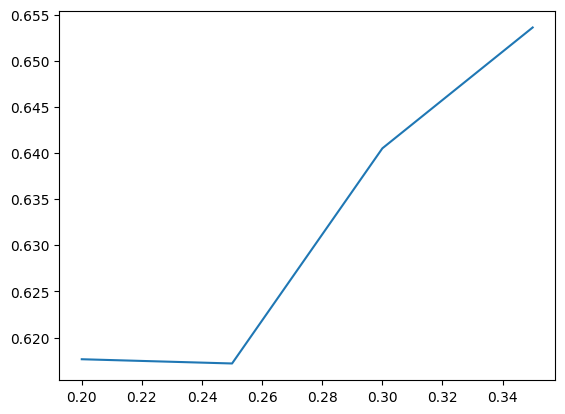

In [30]:
plt.plot(l,accuracy_list1)

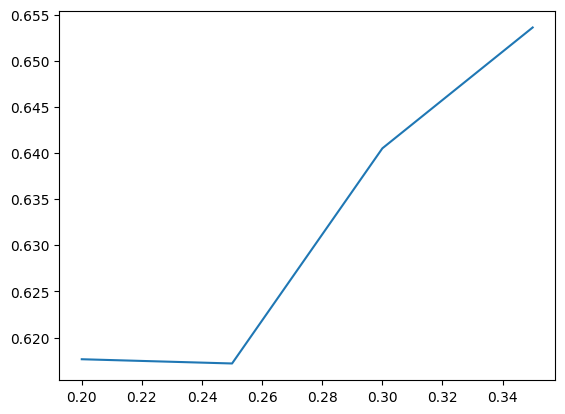

In [31]:
plt.plot(l,accuracy_list2)

In [32]:
print(reports[1])

              precision    recall  f1-score   support

         0.0       0.64      0.63      0.64        68
         1.0       0.59      0.60      0.60        60

    accuracy                           0.62       128
   macro avg       0.62      0.62      0.62       128
weighted avg       0.62      0.62      0.62       128

